#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('data/Merged_Table_1.csv')
traffic = pd.read_csv('data/traff_flights.csv')

In [6]:
data.head(5)

,Unnamed: 0,index,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin_city_name,dest_city_name,crs_dep_time,dep_delay,taxi_out,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,Trip_count_PerDay,Trip_count_Permonth,Trip_count_PerYear,origin_city_condn,dest_city_condn
0,0,0,2018-01-01,WN,5705,"Tampa, FL","Albany, NY",15,28.0,12.0,...,0,160,153.0,134.0,1130,1.001351,30.875000,61.750000,low_rainny,sunny
1,1,1,2018-01-01,WN,988,"New Orleans, LA","Houston, TX",6,-2.0,9.0,...,0,75,69.0,57.0,302,17.332432,534.416667,1068.833333,cloundy,sunny
2,2,2,2018-01-01,WN,1236,"New Orleans, LA","Orlando, FL",5,-1.0,8.0,...,0,100,86.0,70.0,551,5.255405,162.041667,324.083333,cloundy,low_rainny
3,3,3,2018-01-01,WN,233,"New Orleans, LA","Oakland, CA",15,16.0,8.0,...,0,290,283.0,271.0,1903,0.959459,29.583333,59.166667,cloundy,sunny
4,4,4,2018-01-01,WN,446,"New Orleans, LA","St. Louis, MO",18,3.0,6.0,...,0,105,125.0,83.0,604,1.981081,61.083333,122.166667,cloundy,sunny


In [7]:
"""
extract month-year from fl_date columns
"""
month_delay = data[['fl_date','dep_delay','arr_delay']]
month_delay['month'] = pd.to_datetime(month_delay['fl_date']).dt.to_period('M')
month_delay['month'] = month_delay['month'].astype(str)
month_delay.drop(columns='fl_date', inplace=True)

/var/folders/ym/35bxtv511_l6msj7rsw821fm0000gn/T/ipykernel_3068/311472508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_delay['month'] = pd.to_datetime(month_delay['fl_date']).dt.to_period('M')
/var/folders/ym/35bxtv511_l6msj7rsw821fm0000gn/T/ipykernel_3068/311472508.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_delay['month'] = month_delay['month'].astype(str)
/var/folders/ym/35bxtv511_l6msj7rsw821fm0000gn/T/ipykernel_3068/311472508.py:7: SettingWithCopyWarning: 
A value is trying t

In [8]:
average_delay_permonth = month_delay.groupby('month').mean().reset_index()

In [9]:
average_delay_permonth.head(5)

,month,dep_delay,arr_delay
0,2018-01,8.368733,3.033431
1,2018-02,9.361988,3.903248
2,2018-03,12.573117,8.222437
3,2018-04,8.432908,3.672122
4,2018-05,10.850991,5.203373


In [10]:
import numpy as np
import matplotlib.pyplot as plt

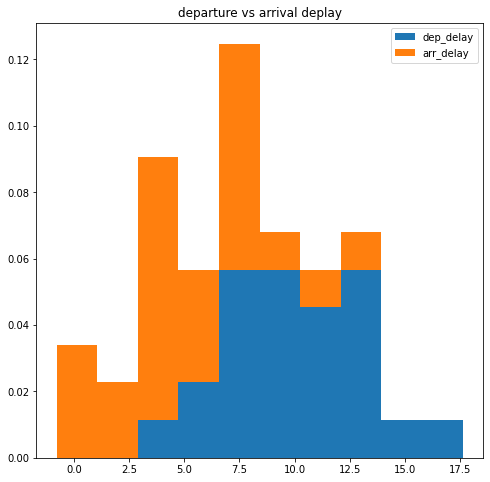

In [12]:
fig,ax0 = plt.subplots(nrows=1, ncols=1,figsize=(8,8))
ax0.hist(average_delay_permonth[['dep_delay', 'arr_delay']],
         10,density=True, stacked=True, label=average_delay_permonth[['dep_delay', 'arr_delay']].columns)
ax0.set_title('departure vs arrival deplay')
plt.legend()
"""
As we can see in the stacked histogram below, departure delay contribute significantly to arrival delay
"""
plt.show()